# Knapsack Problem with Genetic Algorithm

This notebook demonstrates how to solve the knapsack problem using the genetic algorithm implemented in `src/lib/ga.py`.

In [ ]:
# Add path to the central init_notebook.py file (just 5 lines!)
import sys
from pathlib import Path
doc_dir = Path().absolute().parent  # This points to the doc/ directory
if str(doc_dir) not in sys.path:
    sys.path.insert(0, str(doc_dir))

# Now import everything with one line
from doc.init_notebook import GeneticAlgorithm, AssetType, am, torch, np, plt

from dataclasses import dataclass

In [10]:
@dataclass
class KnapsackData:
    """Clase para almacenar los datos del problema de la mochila"""

    weights: torch.Tensor
    values: torch.Tensor
    max_weight: float

In [11]:
def knapsack_fitness(
    population: torch.Tensor, problem_data: KnapsackData
) -> torch.Tensor:
    """
    Función de fitness para el problema de la mochila

    Args:
        population: Tensor de población [pop_size, chromosome_length]
        problem_data: Datos del problema (pesos, valores, peso máximo)

    Returns:
        Tensor con los valores de fitness de cada individuo
    """
    # Calcular el peso total de cada individuo [pop_size]
    total_weights = torch.matmul(population, problem_data.weights)

    # Calcular el valor total de cada individuo [pop_size]
    total_values = torch.matmul(population, problem_data.values)

    # Si el peso total excede el máximo, el fitness es 0
    fitness = torch.where(
        total_weights > problem_data.max_weight,
        torch.zeros_like(total_values),
        total_values,
    )

    return fitness

In [12]:
def display_solution(chromosome: torch.Tensor, problem_data: KnapsackData):
    """
    Muestra la solución encontrada para el problema de la mochila

    Args:
        chromosome: Cromosoma (solución) encontrado
        problem_data: Datos del problema
    """
    selected_indices = torch.where(chromosome == 1)[0].tolist()

    print("\nObjetos seleccionados:")
    print(f"{'Índice':<10}{'Peso':<10}{'Valor':<10}")
    print("-" * 30)

    total_weight = 0
    total_value = 0

    for idx in selected_indices:
        weight = problem_data.weights[idx].item()
        value = problem_data.values[idx].item()
        print(f"{idx:<10}{weight:<10.1f}{value:<10.1f}")
        total_weight += weight
        total_value += value

    print("-" * 30)
    print(f"{'Total:':<10}{total_weight:<10.1f}{total_value:<10.1f}")
    print(
        f"Capacidad utilizada: {total_weight}/{problem_data.max_weight} ({total_weight / problem_data.max_weight * 100:.1f}%)"
    )

## Solve the Knapsack Problem

In [13]:
# Configuración del problema
population_size = 50
n_generations = 100
n_objects = 8
bag_capacity = 50

# Generar pesos y valores aleatorios para los objetos
weights = torch.randint(1, 10, (n_objects,), dtype=torch.float32)
values = torch.randint(1, 15, (n_objects,), dtype=torch.float32)

print(f"\033[92mKnapsack Problem\033[0m\n")
print(f"Weights: {weights.tolist()}")
print(f"Values: {values.tolist()}")
print(f"Maximum weight capacity: {bag_capacity}")

# Crear objeto de datos para el problema
problem_data = KnapsackData(weights=weights, values=values, max_weight=bag_capacity)

Knapsack Problem

Weights: [2.0, 7.0, 3.0, 9.0, 1.0, 2.0, 6.0, 2.0]
Values: [2.0, 7.0, 3.0, 10.0, 5.0, 9.0, 3.0, 8.0]
Maximum weight capacity: 50


In [14]:
# Crear y ejecutar el algoritmo genético
ga = GeneticAlgorithm(
    pop_size=population_size,
    chromosome_length=n_objects,
    fitness_function=knapsack_fitness,
    problem_data=problem_data,
    mutation_rate=0.05,
    crossover_rate=0.8,
    elitism=2,
    maximize=True,
    binary=True,
)

best_chromosome, best_fitness = ga.run(n_generations)

Generación 1: Mejor fitness = 40.00, Fitness promedio = 21.42
Generación 10: Mejor fitness = 47.00, Fitness promedio = 44.58
Generación 20: Mejor fitness = 47.00, Fitness promedio = 45.30
Generación 30: Mejor fitness = 47.00, Fitness promedio = 45.34
Generación 40: Mejor fitness = 47.00, Fitness promedio = 44.86
Generación 50: Mejor fitness = 47.00, Fitness promedio = 45.12
Generación 60: Mejor fitness = 47.00, Fitness promedio = 44.88
Generación 70: Mejor fitness = 47.00, Fitness promedio = 45.14
Generación 80: Mejor fitness = 47.00, Fitness promedio = 44.04
Generación 90: Mejor fitness = 47.00, Fitness promedio = 43.98
Generación 100: Mejor fitness = 47.00, Fitness promedio = 45.22

Mejor solución encontrada:
Fitness: 47.00
Cromosoma: [1, 1, 1, 1, 1, 1, 1, 1]


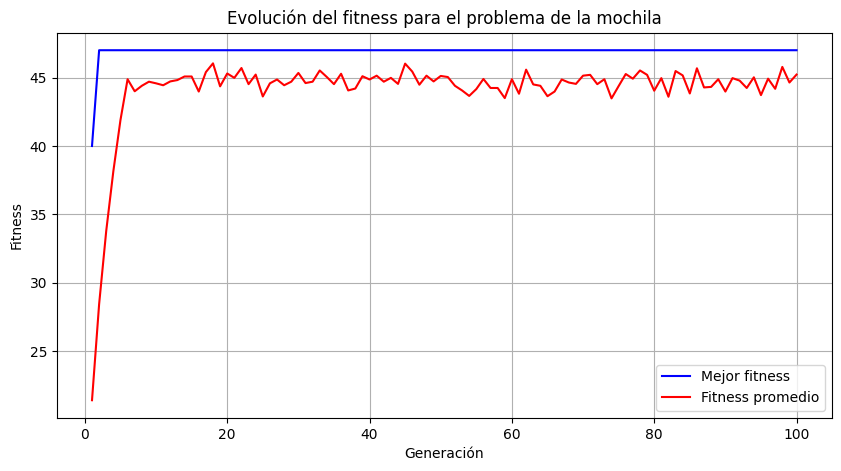


Objetos seleccionados:
Índice    Peso      Valor     
------------------------------
0         2.0       2.0       
1         7.0       7.0       
2         3.0       3.0       
3         9.0       10.0      
4         1.0       5.0       
5         2.0       9.0       
6         6.0       3.0       
7         2.0       8.0       
------------------------------
Total:    32.0      47.0      
Capacidad utilizada: 32.0/50 (64.0%)


In [15]:
# Visualizar resultados
ga.plot_history(title="Evolución del fitness para el problema de la mochila")

# Mostrar detalles de la solución
display_solution(best_chromosome, problem_data)

## Save Results to Temp Directory

In [16]:
# Ensure temp directory exists
temp_dir = am.get_asset_path(AssetType.TEMP)
am.ensure_path_exists(temp_dir)

# Create and save the figure
plt.figure(figsize=(10, 5))
generations = range(1, len(ga.best_fitness_history) + 1)
plt.plot(generations, ga.best_fitness_history, 'b-', label='Mejor fitness')
plt.plot(generations, ga.avg_fitness_history, 'r-', label='Fitness promedio')
plt.title("Evolución del fitness (guardado)")
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)

# Get path for saving and save
save_path = am.get_temp('knapsack_results.png', absolute=True)
plt.savefig(save_path)
plt.close()

print(f"Saved results to: {save_path}")

Saved results to: c:\Users\fire\Documents\Code\python\ai\dt\temp\knapsack_results.png
